In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
df = pd.read_csv('C:/Users/User/Desktop/Python Assignment/Datasets/all_data_copy.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
373696,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [3]:
data=df.copy

In [4]:
df.shape

(373700, 6)

In [5]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,372610,372610,372610,372610,372610,372610
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,710,43806,337104,43806,710,710


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 17.1+ MB


In [7]:
df.isnull().sum()*100/df.shape[0]

Order ID            0.291678
Product             0.291678
Quantity Ordered    0.291678
Price Each          0.291678
Order Date          0.291678
Purchase Address    0.291678
dtype: float64

**There are around 0.3 % i.e 1090 null values in each column**

In [8]:
df= df.dropna(how='all')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
373696,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [9]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,372610,372610,372610,372610,372610,372610
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,710,43806,337104,43806,710,710


In [11]:
df = df[df['Order Date'].str[0:5] != 'Order']

In [12]:
df['Order Date']= pd.to_datetime(df['Order Date'])

In [13]:
df['Day']=df['Order Date'].dt.day_name()
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Tuesday
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Monday


In [14]:
df['Month']=df['Order Date'].dt.month_name()
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day,Month
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Tuesday,January
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Monday,January


In [15]:
df['Year']=df['Order Date'].dt.year
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day,Month,Year
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Tuesday,January,2019
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Monday,January,2019


In [16]:
df['Hour']=df['Order Date'].dt.hour
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day,Month,Year,Hour
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Tuesday,January,2019,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Monday,January,2019,14


In [17]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day,Month,Year,Hour,City
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Tuesday,January,2019,21,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Monday,January,2019,14,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",Thursday,January,2019,13,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Saturday,January,2019,20,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Friday,January,2019,11,Austin
...,...,...,...,...,...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Tuesday,September,2019,20,Los Angeles
373696,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",Sunday,September,2019,16,San Francisco
373697,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",Monday,September,2019,7,San Francisco
373698,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",Thursday,September,2019,17,San Francisco


In [18]:
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'])
df['Price Each']=pd.to_numeric(df['Price Each'])

df['Sales']= df['Quantity Ordered']*df['Price Each']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371900 entries, 0 to 373699
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          371900 non-null  object        
 1   Product           371900 non-null  object        
 2   Quantity Ordered  371900 non-null  int64         
 3   Price Each        371900 non-null  float64       
 4   Order Date        371900 non-null  datetime64[ns]
 5   Purchase Address  371900 non-null  object        
 6   Day               371900 non-null  object        
 7   Month             371900 non-null  object        
 8   Year              371900 non-null  int64         
 9   Hour              371900 non-null  int64         
 10  City              371900 non-null  object        
 11  Sales             371900 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 36.9+ MB


## Summary

- there are 0.3% null values present in columns. so these null values rows are dropped-
- Order date is in string format, it should be converted to datetime for extracting day and month from the column.
- also order date have some string character present. it is necessary to remove them. 
- day, month and year time is extracted from the order date
- also 'Quantity ordered' and 'Price Each' is converted into numerical data 
- salesTotal cost of the product is calculated from 'Quantity Ordered' and 'Price Each'



### What is the distribution of sales among different cities in different months?
**a.Which city had the highest sales overall?**





In [19]:
df.groupby(by=['City'])['Sales'].sum()

City
 Atlanta          5.590997e+06
 Austin           3.639164e+06
 Boston           7.323284e+06
 Dallas           5.535951e+06
 Los Angeles      1.090514e+07
 New York City    9.328635e+06
 Portland         4.640981e+06
 San Francisco    1.652441e+07
 Seattle          5.495511e+06
Name: Sales, dtype: float64

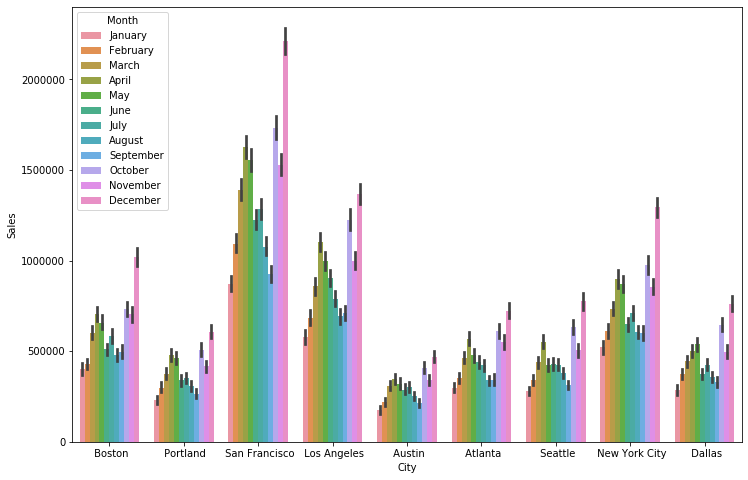

In [34]:

plt.figure(figsize=(12,8))

sns.barplot(x='City', y='Sales',hue="Month", data= df, estimator=sum)


**San Francisco city has highest overall sales**

### b.Which Month had the highest amount of sales overall?

Text(0.5, 1.0, 'Month wise Sales')

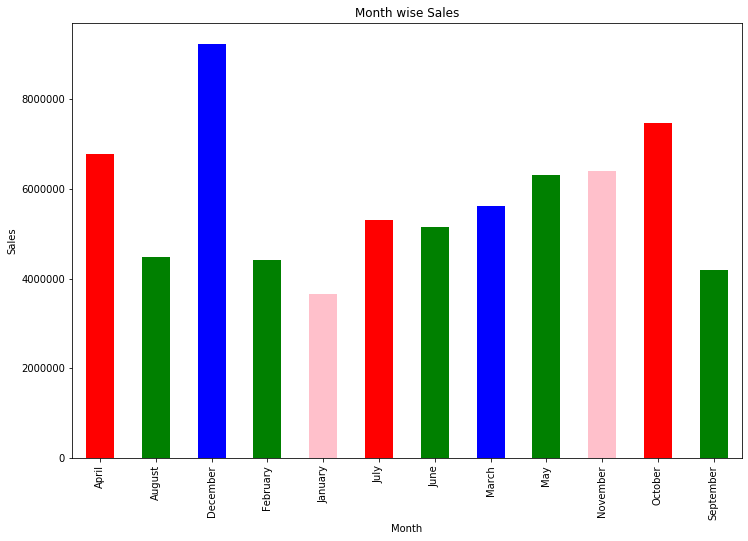

In [21]:
plt.figure(figsize=(12,8))

df.groupby(by=['Month'])['Sales'].sum().plot(x=df['Month'], y=df['Sales'], kind='bar', color=['r','g','b','g','pink'])
plt.ylabel("Sales")

plt.title("Month wise Sales")

### December Month has overall highest sales

### c.Most bought products per city.

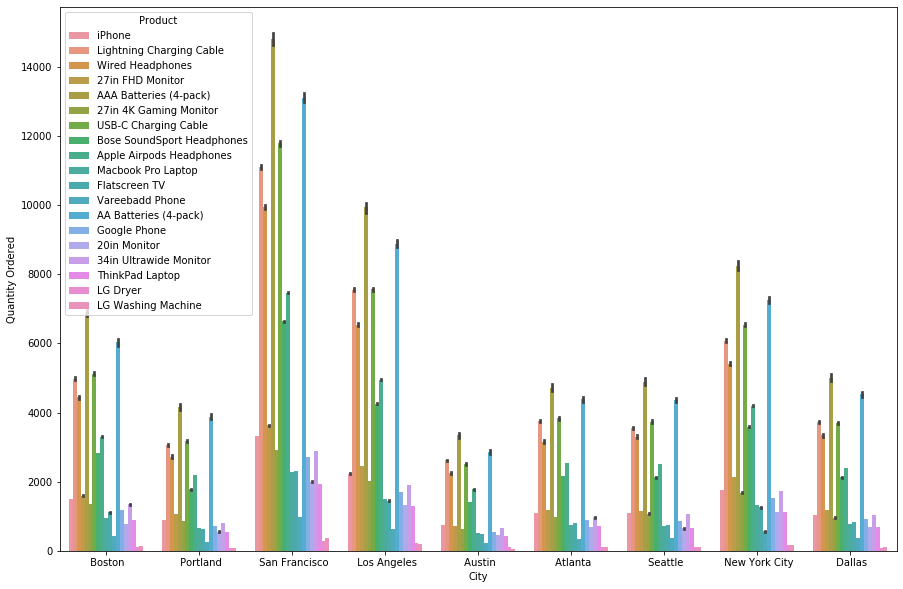

In [22]:
figure=plt.figure(figsize=(15,10))
sns.barplot('City','Quantity Ordered',hue='Product',data=df, estimator= sum)

In [23]:
df.groupby(by=['Product'])['Quantity Ordered'].sum()

Product
20in Monitor                   8258
27in 4K Gaming Monitor        12488
27in FHD Monitor              15100
34in Ultrawide Monitor        12398
AA Batteries (4-pack)         55270
AAA Batteries (4-pack)        62034
Apple Airpods Headphones      31322
Bose SoundSport Headphones    26914
Flatscreen TV                  9638
Google Phone                  11064
LG Dryer                       1292
LG Washing Machine             1332
Lightning Charging Cable      46434
Macbook Pro Laptop             9456
ThinkPad Laptop                8260
USB-C Charging Cable          47950
Vareebadd Phone                4136
Wired Headphones              41114
iPhone                        13698
Name: Quantity Ordered, dtype: int64

### AAA Batteries (4-pack) is most bought product in each city

### new branch can be opned in Sanfrancisco city as it has high demand

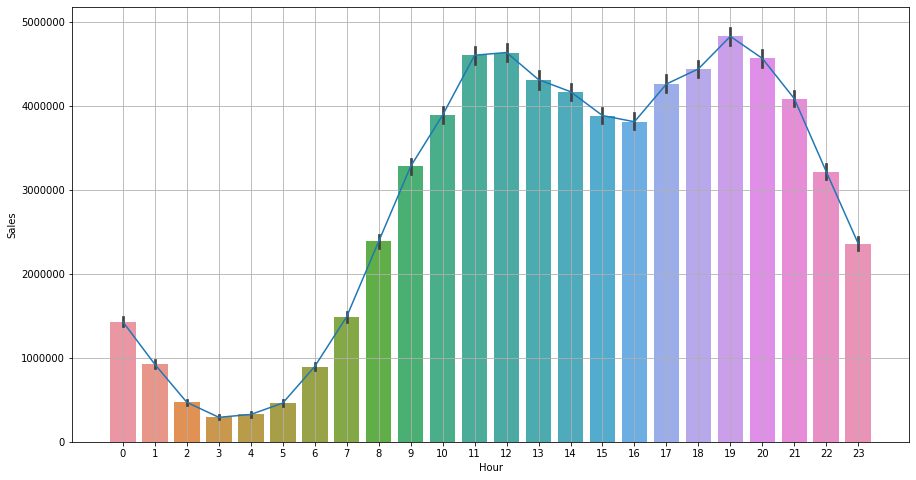

In [24]:
plt.figure(figsize=(15,8))
sns.barplot('Hour', 'Sales',data=df, estimator= sum)
df.groupby('Hour')['Sales'].sum().plot(x='Hour',y='Sales', kind='line')
plt.grid(True)



### Most sales are at 11.00 -12.00 am in morning and 7.00-8.00 pm in evening. these are the hours are in which most orders are placed

### 6.Find out the pair of products that are most sold together. 

In [25]:
df['Order ID'].value_counts()

160873    10
196615     8
277875     8
304802     8
289117     8
          ..
214244     2
269035     2
170814     2
153169     2
160362     2
Name: Order ID, Length: 178437, dtype: int64

In [26]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
373695     True
373696     True
373697     True
373698     True
373699     True
Length: 371900, dtype: bool

In [27]:
# dropping the product and address duplicates first.
df1=df.drop_duplicates(subset=['Product','Purchase Address'],keep='first')

In [28]:
df2 = df1[df1['Order ID'].duplicated(keep=False)]

In [29]:
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day,Month,Year,Hour,City,Sales
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",Monday,January,2019,16,Austin,11.95
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",Monday,January,2019,16,Austin,11.99
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",Wednesday,January,2019,8,Los Angeles,150.00
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",Wednesday,January,2019,8,Los Angeles,11.52
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",Thursday,January,2019,11,New York City,400.00
...,...,...,...,...,...,...,...,...,...,...,...,...
186761,319584,Wired Headphones,1,11.99,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035",Wednesday,December,2019,0,Portland,11.99
186773,319596,iPhone,1,700.00,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",Sunday,December,2019,8,New York City,700.00
186774,319596,Lightning Charging Cable,1,14.95,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",Sunday,December,2019,8,New York City,14.95
186809,319631,34in Ultrawide Monitor,1,379.99,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301",Tuesday,December,2019,22,Austin,379.99


In [30]:
df2['Grouped'] = df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day,Month,Year,Hour,City,Sales,Grouped
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",Monday,January,2019,16,Austin,11.95,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",Monday,January,2019,16,Austin,11.99,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",Wednesday,January,2019,8,Los Angeles,150.00,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",Wednesday,January,2019,8,Los Angeles,11.52,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",Thursday,January,2019,11,New York City,400.00,"Vareebadd Phone,Wired Headphones"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186761,319584,Wired Headphones,1,11.99,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035",Wednesday,December,2019,0,Portland,11.99,"iPhone,Wired Headphones"
186773,319596,iPhone,1,700.00,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",Sunday,December,2019,8,New York City,700.00,"iPhone,Lightning Charging Cable"
186774,319596,Lightning Charging Cable,1,14.95,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",Sunday,December,2019,8,New York City,14.95,"iPhone,Lightning Charging Cable"
186809,319631,34in Ultrawide Monitor,1,379.99,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301",Tuesday,December,2019,22,Austin,379.99,"34in Ultrawide Monitor,Lightning Charging Cable"


In [31]:
df2 = df2[['Order ID', 'Grouped']].drop_duplicates()

In [32]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 974
('Google Phone', 'USB-C Charging Cable') 947
('iPhone', 'Wired Headphones') 433
('Google Phone', 'Wired Headphones') 395
('iPhone', 'Apple Airpods Headphones') 353
('Vareebadd Phone', 'USB-C Charging Cable') 347
('Google Phone', 'Bose SoundSport Headphones') 216
('USB-C Charging Cable', 'Wired Headphones') 142
('Vareebadd Phone', 'Wired Headphones') 138
('Lightning Charging Cable', 'Wired Headphones') 89


### (iphone and Lightening Charging cable) and (Google Phone', 'USB-C Charging Cable )are two products which are sold in pair most of the time. so we can give discount on these products if they are ordered together.